# Chapter 2 - Pretrained Networks

## Part I: Image Recognition

## Obtain a Pretrained Network

In [1]:
import torch
import torchvision
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'Inception3',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vgg16_bn',
 'vgg19',
 'vgg19_bn',
 'video',
 'wide_resnet101_2',
 'wide_resnet50_2']

## AlexNet

In [3]:
alexnet = models.AlexNet()

In [10]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## ResNet

In [ ]:
resnet = models.resnet101(pretrained=True)
resnet

In [5]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

In [6]:
from PIL import Image

img = Image.open('/Users/dongdongdongdong/Desktop/Deep-Learning-with-PyTorch/Datasets/Chapter 2/bobby.jpg')

In [12]:
img.show()

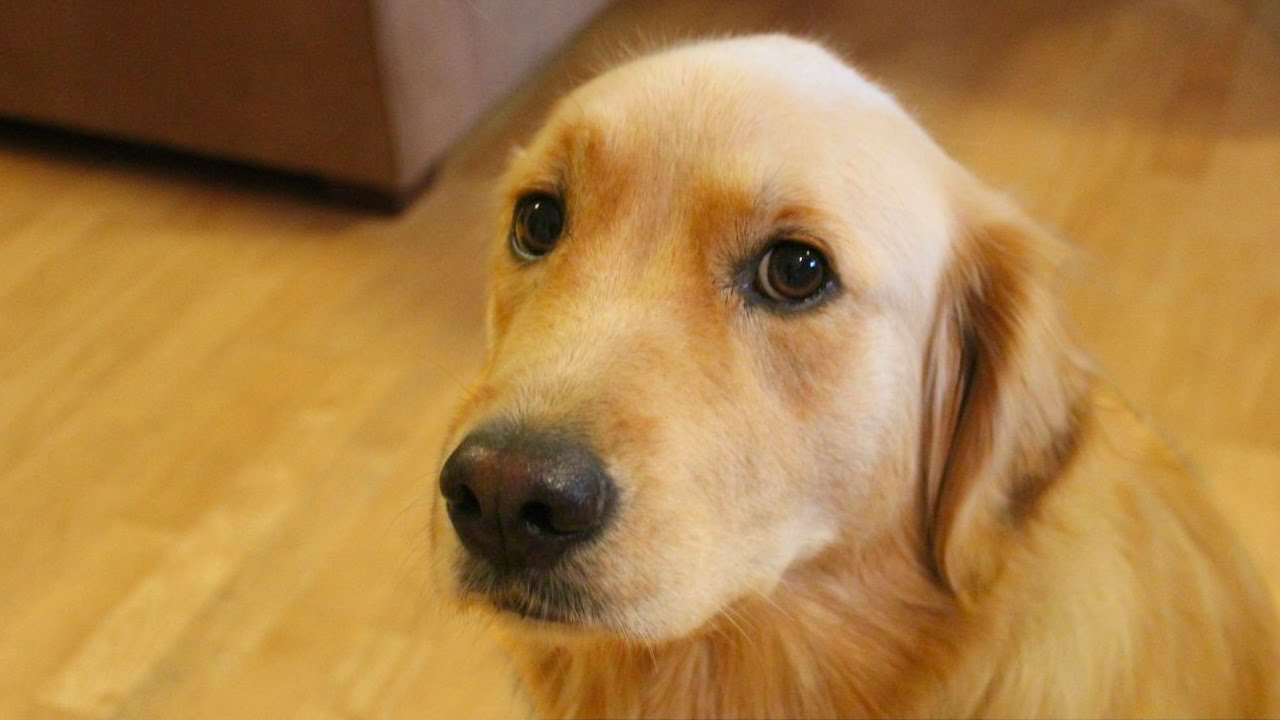

In [13]:
img

In [8]:
img_t = preprocess(img)

In [9]:
img_t.shape

torch.Size([3, 224, 224])

In [14]:
batch_t = torch.unsqueeze(img_t, 0)

## Run

In [ ]:
resnet.eval()

In [16]:
out = resnet(batch_t)
out.shape

torch.Size([1, 1000])

In [17]:
with open('/Users/dongdongdongdong/Desktop/Deep-Learning-with-PyTorch/Datasets/Chapter 2/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
    
labels[:5]

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark']

In [18]:
_, index = torch.max(out, 1)
index

tensor([207])

## Classification Result

In [20]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print('The class is {}, with a probability of {}%.'.format(labels[index[0]], percentage[index[0]].item()))

The class is golden retriever, with a probability of 96.29335021972656%.


### Top-5 Result:

In [21]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 96.29335021972656),
 ('Labrador retriever', 2.8081188201904297),
 ('cocker spaniel, English cocker spaniel, cocker', 0.28267431259155273),
 ('redbone', 0.20863044261932373),
 ('tennis ball', 0.11621593683958054)]